In [ ]:
%matplotlib inline

from glob              import glob
from matplotlib        import pyplot as plt
from matplotlib.ticker import NullFormatter
from re                import findall

In [2]:
def read_bleu_pplx(patn,bleu_epochs,pplx_epochs):
    data = {}
    for output_path in glob(patn):
        with open(output_path, 'r') as output_file:
            output_contents = output_file.read()
            bleu_scores = map(float,findall(r'BLEU: (\d+\.\d+)', output_contents))
            bleu_scores = list(zip(bleu_epochs, bleu_scores))
            pplx_scores = map(float,findall(r'dev perplexity \| (\d+\.\d+)', output_contents))
            pplx_scores = list(zip(pplx_epochs, pplx_scores))
            data[output_path] = {'bleu': bleu_scores, 'pplx': pplx_scores}
    return data

In [5]:
def plot_bleu_pplx(data,name,words_in_dev,baseline_bleu,baseline_pplx,baseline_epoch):
    
    plt.figure(1, figsize=(8,8))
    
    bleu = plt.axes([0.0, 0.52, 0.8, 0.49])
    pplx = plt.axes([0.0, 0.0 , 0.8, 0.49])

    for key, val in data.items():
        epoch, bleu_score = zip(*val['bleu'])
        epoch = [e + 1 for e in epoch]
        bleu.plot(epoch, bleu_score, label=key)
        epoch, pplx_score = zip(*val['pplx'])
        epoch = [e + 1 for e in epoch]
        pplx.plot(epoch, pplx_score, label=key)

    def keep_lim(ax, func):
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        func(ax)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    
    keep_lim(bleu, lambda ax: ax.scatter([baseline_epoch], [baseline_bleu], label='baseline (0)'))
    keep_lim(pplx, lambda ax: ax.scatter([baseline_epoch], [baseline_pplx], label='baseline (0)'))
    name['baseline (0)'] = 'baseline (0)'

    nullfmt = NullFormatter()
    bleu.xaxis.set_major_formatter(nullfmt)
    bleu.set_ylabel('BLEU')
    pplx.set_ylabel('Perplexity ({} words)'.format(words_in_dev))
    pplx.set_xlabel('# Epochs')

    handles, labels = bleu.get_legend_handles_labels()
    handles, labels = zip(*map(lambda t: (t[0], name[t[1]]),sorted(zip(handles, labels), key=lambda t: t[1])))
    bleu.legend(handles, labels, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

    plt.show()

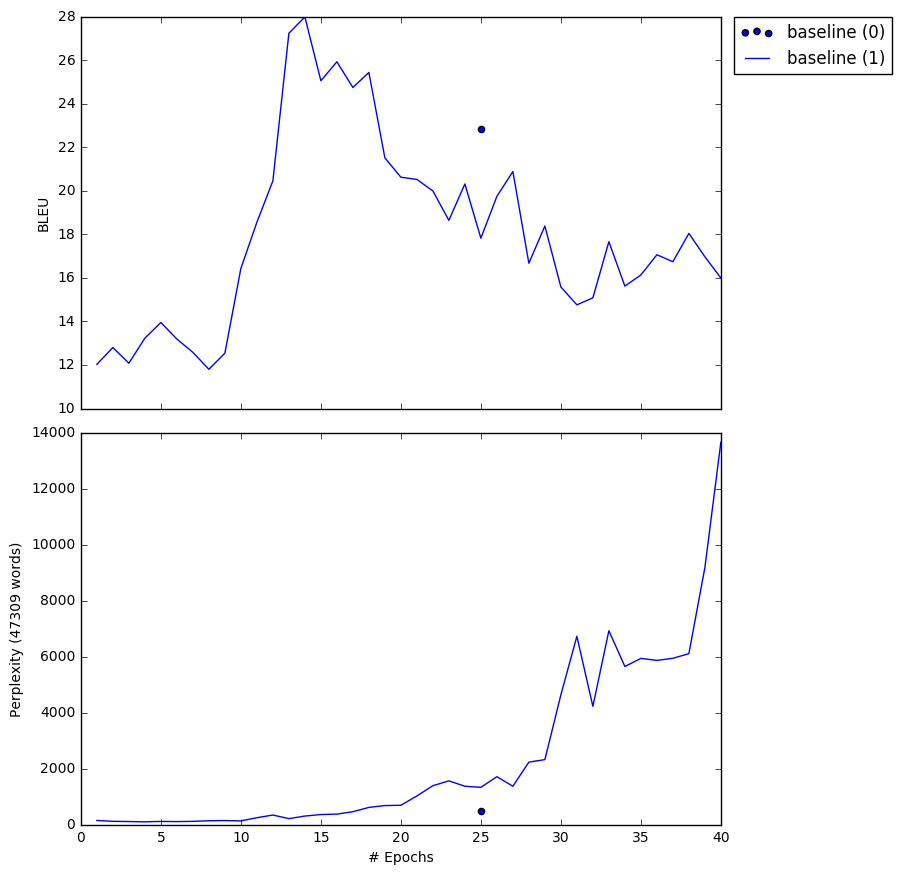

In [6]:
BLEU_EPOCHS     = range(40)
PPLX_EPOCHS     = range(40)
IN_BASE0_BLEU   = 22.82
IN_BASE0_PPLX   = 465.232989
IN_BASE0_EPOCH  = 25
IN_WORDS_IN_DEV = 47309

IN_NAME = {
    'in_en_model_50000/seq2seq_50000sen_3-3layers_200units_base1_SOFT_ATTN.scores': 'baseline (1)'
}

plot_bleu_pplx(read_bleu_pplx('in*model*/*.scores',
                             bleu_epochs=BLEU_EPOCHS,
                             pplx_epochs=PPLX_EPOCHS), 
               name=IN_NAME, 
               words_in_dev=IN_WORDS_IN_DEV, 
               baseline_bleu=IN_BASE0_BLEU,
               baseline_pplx=IN_BASE0_PPLX,
               baseline_epoch=IN_BASE0_EPOCH)

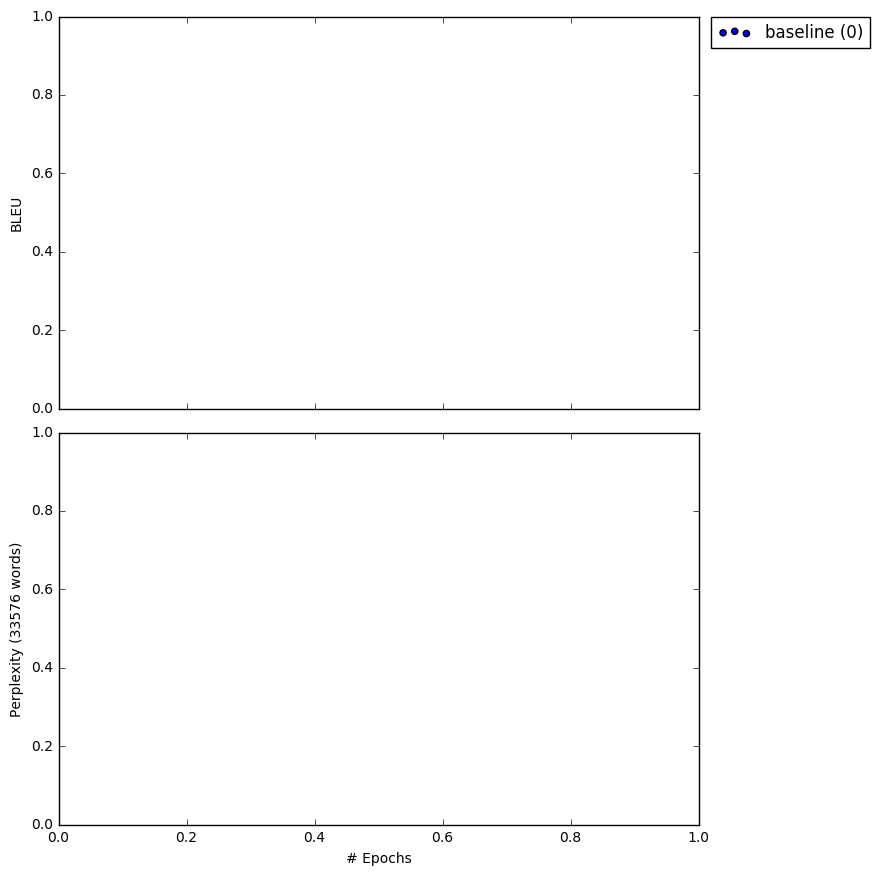

In [7]:
BLEU_EPOCHS     = range(60)
PPLX_EPOCHS     = range(60)
HU_BASE0_BLEU   = 26.03
HU_BASE0_PPLX   = 90.104580
HU_BASE0_EPOCH  = 40
HU_WORDS_IN_DEV = 33576

HU_NAME = {
    'hu_en_model_50000/seq2seq_50000sen_3-3layers_200units_base1_SOFT_ATTN.scores': 'baseline (1)'
}

plot_bleu_pplx(read_bleu_pplx('hu*model*/*.scores',
                              bleu_epochs=BLEU_EPOCHS,
                              pplx_epochs=PPLX_EPOCHS), 
               name=HU_NAME, 
               words_in_dev=HU_WORDS_IN_DEV, 
               baseline_bleu=HU_BASE0_BLEU,
               baseline_pplx=HU_BASE0_PPLX,
               baseline_epoch=HU_BASE0_EPOCH)